
# CIFAR-10 Multiple Classes

We used a famous data set, the CIFAR-10 dataset which consists of 10 different image types.We will use this dataset to build a Convolutional Neural Network that classifies the images.

In [1]:
import pandas as pd
import numpy as np

# The Data

CIFAR-10 is a dataset of 50,000 32x32 color training images, labeled over 10 categories, and 10,000 test images.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt

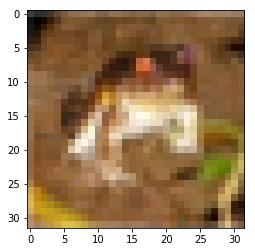

In [6]:
# FROG
plt.imshow(x_train[0])

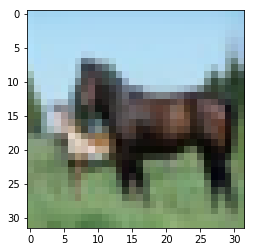

In [7]:
# HORSE
plt.imshow(x_train[12])

# PreProcessing

In [8]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [9]:
x_train[0].shape

(32, 32, 3)

In [10]:
x_train.max()

255

In [11]:
x_train = x_train/225

In [12]:
x_test = x_test/255

In [13]:
x_train.shape

(50000, 32, 32, 3)

In [14]:
x_test.shape

(10000, 32, 32, 3)

## Labels

In [15]:
from tensorflow.keras.utils import to_categorical

In [16]:
y_train.shape

(50000, 1)

In [17]:
y_train[0]

array([6], dtype=uint8)

In [18]:
y_cat_train = to_categorical(y_train,10)

In [19]:
y_cat_train.shape

(50000, 10)

In [20]:
y_cat_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [21]:
y_cat_test = to_categorical(y_test,10)

----------
# Building the Model

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [23]:
model = Sequential()

## FIRST SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

## SECOND SET OF LAYERS

# CONVOLUTIONAL LAYER
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(32, 32, 3), activation='relu',))
# POOLING LAYER
model.add(MaxPool2D(pool_size=(2, 2)))

# FLATTEN IMAGES FROM 32 by 32 by 3 to 3072 BEFORE FINAL LAYER
model.add(Flatten())

# 256 NEURONS IN DENSE HIDDEN LAYER (YOU CAN CHANGE THIS NUMBER OF NEURONS)
model.add(Dense(256, activation='relu'))

# LAST LAYER IS THE CLASSIFIER, THUS 10 POSSIBLE CLASSES
model.add(Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor='val_loss',patience=3)

In [33]:
model.fit(x_train,y_cat_train,epochs=15,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/15
1563/1563 [==============================] - 58s 37ms/step - loss: 1.7535 - accuracy: 0.3611 - val_loss: 1.2668 - val_accuracy: 0.5580
Epoch 2/15
1563/1563 [==============================] - 51s 33ms/step - loss: 1.2002 - accuracy: 0.5764 - val_loss: 1.1445 - val_accuracy: 0.5945
Epoch 3/15
1563/1563 [==============================] - 62s 40ms/step - loss: 1.0185 - accuracy: 0.6461 - val_loss: 1.1810 - val_accuracy: 0.5877
Epoch 4/15
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9167 - accuracy: 0.6839 - val_loss: 1.1110 - val_accuracy: 0.6179
Epoch 5/15
1563/1563 [==============================] - 53s 34ms/step - loss: 0.8312 - accuracy: 0.7118 - val_loss: 0.9748 - val_accuracy: 0.6678
Epoch 6/15
1563/1563 [==============================] - 51s 33ms/step - loss: 0.7540 - accuracy: 0.7425 - val_loss: 1.1392 - val_accuracy: 0.6343
Epoch 7/15
1563/1563 [==============================] - 47s 30ms/step - loss: 0.6914 - accuracy: 0.7638 - val_loss: 1.0126 -

In [42]:
# Careful, don't overwrite our file!
# model.save('cifar_10epochs.h5')

In [34]:
losses = pd.DataFrame(model.history.history)

In [35]:
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,1.527729,0.45130,1.266782,0.5580
1,1.167274,0.59124,1.144492,0.5945
2,1.013652,0.64898,1.180956,0.5877
3,0.912840,0.68498,1.111049,0.6179
4,0.832487,0.71294,0.974800,0.6678


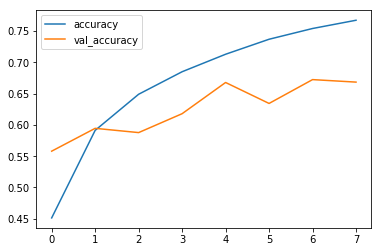

In [36]:
losses[['accuracy','val_accuracy']].plot()

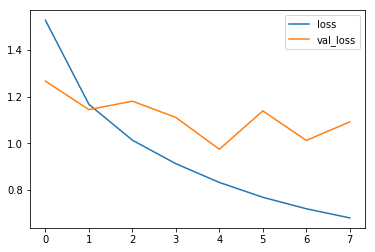

In [37]:
losses[['loss','val_loss']].plot()

In [38]:
model.metrics_names

['loss', 'accuracy']

In [39]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[1.0919382572174072, 0.66839998960495]


In [40]:
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict_classes(x_test)

/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [41]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.77      0.68      0.72      1000
           1       0.86      0.77      0.81      1000
           2       0.58      0.51      0.54      1000
           3       0.48      0.45      0.47      1000
           4       0.51      0.75      0.61      1000
           5       0.49      0.67      0.57      1000
           6       0.77      0.75      0.76      1000
           7       0.75      0.70      0.72      1000
           8       0.87      0.73      0.79      1000
           9       0.80      0.69      0.74      1000

   micro avg       0.67      0.67      0.67     10000
   macro avg       0.69      0.67      0.67     10000
weighted avg       0.69      0.67      0.67     10000



In [53]:
confusion_matrix(y_test,predictions)

array([[665,  25,  50,   5,   8,   9,   9,   3, 206,  20],
       [ 22, 769,  13,   9,   1,   5,  10,   1, 105,  65],
       [ 83,   8, 613,  35,  45,  71,  60,   9,  59,  17],
       [ 34,  22, 138, 394,  48, 210,  62,  11,  58,  23],
       [ 41,   4, 145,  49, 550,  58,  67,  24,  54,   8],
       [ 20,   7,  99, 131,  37, 614,  39,  16,  25,  12],
       [ 15,  10,  74,  52,  30,  19, 757,   1,  30,  12],
       [ 32,   7, 104,  44,  69, 122,  12, 548,  23,  39],
       [ 27,  13,  14,   4,   3,   3,   1,   0, 924,  11],
       [ 39,  89,  17,   8,   0,   9,   3,   7, 118, 710]], dtype=int64)

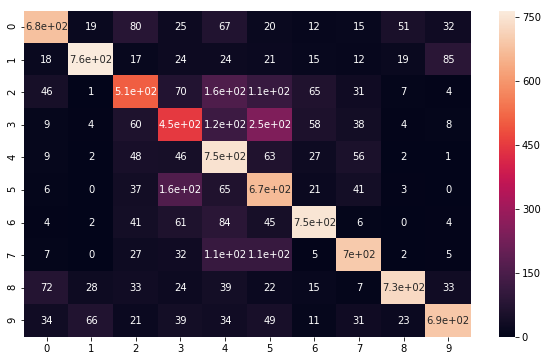

In [42]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)
# https://github.com/matplotlib/matplotlib/issues/14751

# Predicting a given image

In [60]:
my_image = x_test[16]

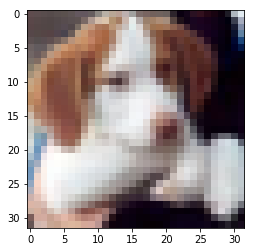

In [61]:
plt.imshow(my_image) #Dog

In [62]:
# SHAPE --> (num_images,width,height,color_channels)
np.argmax(model.predict(my_image.reshape(1,32,32,3)),axis=-1)

array([5])

In [ ]:
# 5 is DOG
# https://www.cs.toronto.edu/~kriz/cifar.html